In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231006/code - update_1/iris_1D.csv',
                     delimiter=',',
                     skip_header=1)

X = iris[:, :1]
y = iris[:, 1]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(6, 2)
(6,)


In [3]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return ((y_hat-y)*(y_hat-y)).mean()

def predict(X, theta):
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)*y_hat*(1-y_hat)*2) / y.size

In [4]:
lr=0.1
num_iter=50000

#theta = np.array([0.1,5])
theta = np.array([0.1,-5])
losses = []
accs   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)

    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)

    theta -= lr*gradient

    # for debug
    losses.append(loss)

    # accuracy for training
    preds = predict(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc)

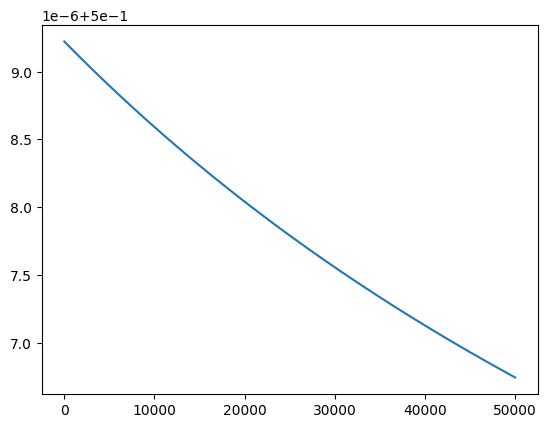

In [5]:
# show figures
plt.plot(losses)
plt.show()

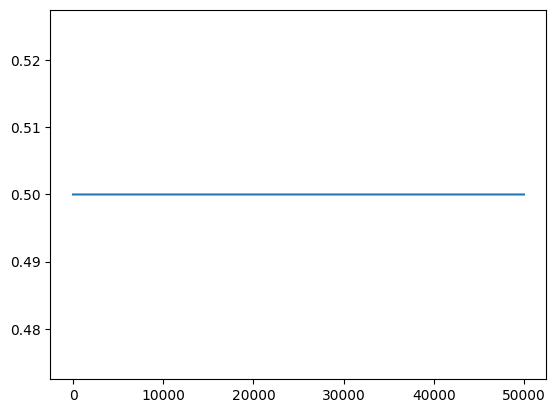

In [6]:
plt.plot(accs)
plt.show()

In [7]:
preds = predict(X, theta).round()
print(preds)
print(y)

[0. 0. 0. 0. 0. 0.]
[1. 0. 1. 1. 0. 0.]


In [8]:
losses[-10:]

[0.5000067431081042,
 0.5000067430718255,
 0.5000067430355473,
 0.5000067429992693,
 0.5000067429629919,
 0.5000067429267148,
 0.5000067428904381,
 0.5000067428541618,
 0.5000067428178857,
 0.5000067427816103]